In [1]:
# Importing all required Libraries ----------------------------------------------------------------

import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Reading out all the files to be examined --------------------------------------------------------

Ratings = pd.read_csv('users-books-dataset/BX-Book-Ratings.csv', sep=';',encoding='latin-1')
Users = pd.read_csv('users-books-dataset/BX-Users.csv', sep=';',encoding='latin-1')
Books = pd.read_csv('users-books-dataset/BX-Books.csv', sep=';',encoding='latin-1',escapechar='\\')

In [3]:
# Combining dataframes to get the new as a whole data sets
# here we'll merge based on ISBN and User id and the type will be inner join.

Result=(Ratings.merge(Books, on=['ISBN'])).merge(Users, on=['User-ID'])
Result.set_index('ISBN', inplace=True)  # Setting ISBN as index

In [4]:
# Question No.1 -----------------------------------
# Checking for duplicate values for all column values matching
# if any duplicate found, then sum it, that will result the size of redundant data present.
# If not, then Redundant data will be 0.

(Result.duplicated()==True).sum()

0

In [5]:
# Same for false value that is 'not duplicate'
# Or just confirming wheather the false count is same as the size of series

# Comment either of below statement to get results either in boolean or in integer
# ---------------------------------------------------------

# (Result.duplicated()==False).sum()
(Result.duplicated()==False).sum()==Result.count()



User-ID                 True
Book-Rating             True
Book-Title              True
Book-Author            False
Year-Of-Publication     True
Publisher              False
Image-URL-S             True
Image-URL-M             True
Image-URL-L             True
Location                True
Age                    False
dtype: bool

In [5]:
# check for inconsistency
Result['Year-Of-Publication'].max()

2050

In [6]:
# check for inconsistency
Result['Age'].max()

244.0

In [7]:
# Now we'll check for inconsistent datas 
# For that we need sample of some 10 items to interpret our assumptions
Result.sample(10)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
ISBN,,,,,,,,,,,
055315818X,11676,9,"Crybaby Lois (Sweet Valley Kids, No 11)",Molly Mia Stewart,1990,Bantam Books (Mm),http://images.amazon.com/images/P/055315818X.0...,http://images.amazon.com/images/P/055315818X.0...,http://images.amazon.com/images/P/055315818X.0...,"n/a, n/a, n/a",NaN
0440189438,189139,0,Triplets,Joyce Rebeta-Burditt,1982,Dell Publishing Company,http://images.amazon.com/images/P/0440189438.0...,http://images.amazon.com/images/P/0440189438.0...,http://images.amazon.com/images/P/0440189438.0...,"lake country, british columbia, canada",40.0
039480001X,30131,10,The Cat in the Hat,Dr. Seuss,1957,Random House Books for Young Readers,http://images.amazon.com/images/P/039480001X.0...,http://images.amazon.com/images/P/039480001X.0...,http://images.amazon.com/images/P/039480001X.0...,"college station, texas, usa",25.0
080213095X,211426,8,World of the Buddha: An Introduction to Buddhi...,Lucien Stryk,1982,Grove Press,http://images.amazon.com/images/P/080213095X.0...,http://images.amazon.com/images/P/080213095X.0...,http://images.amazon.com/images/P/080213095X.0...,"pueblo, colorado, usa",24.0
1558532331,234623,10,Postcards From Life's Little Instruction Book,"H. Jackson, Jr. Brown",1993,Rutledge Hill Press,http://images.amazon.com/images/P/1558532331.0...,http://images.amazon.com/images/P/1558532331.0...,http://images.amazon.com/images/P/1558532331.0...,"scarborough, maine, usa",NaN
3596136156,146967,8,Ein anderes Leben gibt es nicht.,Maria Nurowska,1997,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596136156.0...,http://images.amazon.com/images/P/3596136156.0...,http://images.amazon.com/images/P/3596136156.0...,"hamburg, hamburg, germany",NaN
0451210174,81848,0,Dirty Fire,Earl Merkel,2003,Signet Book,http://images.amazon.com/images/P/0451210174.0...,http://images.amazon.com/images/P/0451210174.0...,http://images.amazon.com/images/P/0451210174.0...,"springfield, illinois, usa",35.0
0864420757,175886,0,Lonely Planet Travel With Children (Lonely Pla...,Maureen Wheeler,1990,Lonely Planet,http://images.amazon.com/images/P/0864420757.0...,http://images.amazon.com/images/P/0864420757.0...,http://images.amazon.com/images/P/0864420757.0...,"hindmarsh island, south australia, australia",52.0
0812507002,257204,0,"Winds of Change (Blood of Ten Chiefs, Vol 3)",Richard Pini,1990,Tor Books,http://images.amazon.com/images/P/0812507002.0...,http://images.amazon.com/images/P/0812507002.0...,http://images.amazon.com/images/P/0812507002.0...,"akron, ohio, usa",32.0


In [7]:
# Limit values by providing constraints
age_Limit = [18, 80]
year = [1900, 2020]
Result.drop(Result[Result['Age'] > age_Limit[1]].index, inplace=True)
Result.drop(Result[Result['Age'] < age_Limit[0]].index, inplace=True)
Result.drop(Result[Result['Year-Of-Publication'] < year[0]].index, inplace=True)
Result.drop(Result[Result['Year-Of-Publication'] > year[1]].index, inplace=True)

In [ ]:
# check value to assure its legit
# comment either of them to get results
# -------------------------------------------------------

Result['Year-Of-Publication'].min()
Result['Year-Of-Publication'].max()


In [ ]:
# check value to assure its legit
# comment either of them to get results
# -------------------------------------------------------

Result['Age'].max()
Result['Age'].min()

In [8]:
# Question No.2 -----------------------------------
# Finding missing values and identifying outliers

In [9]:
(Result[:].isnull()==True).sum()

User-ID                     0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
Location                    0
Age                    185736
dtype: int64

In [10]:
Result['Age'].interpolate(inplace=True)

In [11]:
(Result[:].isnull()==True).sum()

User-ID                0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64

<AxesSubplot:xlabel='Age'>

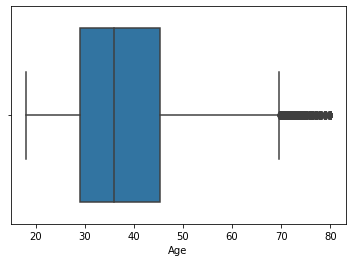

In [12]:
# Managing Outliers
sns.boxplot(x=Result['Age'])

<AxesSubplot:xlabel='Year-Of-Publication'>

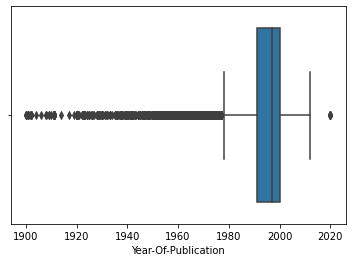

In [13]:
# Managing Outliers
sns.boxplot(x=Result['Year-Of-Publication'])

In [14]:
def outliers(col):
    q1 = Result[col].quantile(.25)
    q3 = Result[col].quantile(.75)
    IQR = q3-q1
    leftLimit = q1-1.5*IQR
    rightLimit = q3+1.5*IQR
    return leftLimit, rightLimit

In [15]:
choice = input('Enter column name')
limit = outliers(choice)
Result.drop(Result[Result[choice] < limit[0]].index, inplace=True)
Result.drop(Result[Result[choice] > limit[1]].index, inplace=True)


<AxesSubplot:xlabel='Age'>

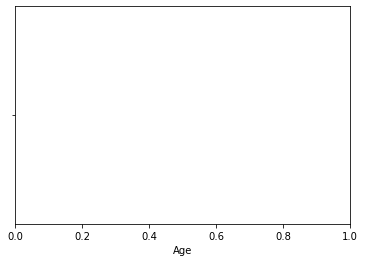

In [19]:
# checking Results
sns.boxplot(x=Result['Year-Of-Publication'])

In [ ]:
sns.distplot(x=Result['Book-Rating'])

In [ ]:
Result['Age'] = Result['Age'].astype(int)

In [ ]:
Result.sample(5)

In [ ]:
# Question No. 3    -----------------------------------
# Normalisation class for calculating values
class normalization:
    """
    This class is having three form
    1. minMax(element = "element of a list(must be numeric)", min = "min value among all the lists", max = "max value among the list")
    2. decScale(element , max)
    3. zScore(x, mean, standard-Deviation)
    """
    def minMax(x,min,max):
        """"
        x is the current element
        min is the minimum of the list
        max is the maximum of the list """
        newMax = 1
        newMin = 0
        val = ((x-min)*(newMax-newMin)/(max-min))+newMin
        return val
    
    def decScale(x, max):
        """"
        x is the current element
        max is the maximum of the list """
        n = len(str(max))
        val = x/(10**n)
        return val
    
    def zScore(x, mean, stdevi):
        """"
        x is the current element
        mean is the mean of the list
        stdev is the standard deviation of the list """
        val = (x-mean)/stdevi
        return val

In [ ]:
# Normalization
choice = int(input('''
Menu:
1. Min Max Normalisation
2. Decimal Scaling
3. z Score
'''))

colIndex = input('Enter the name of the column to be Normalise: ')

if choice==1:
    min = Result[colIndex].min()
    max = Result[colIndex].max()
    NoramliseData = Result[colIndex].apply(normalization.minMax, args=(min,max))
elif choice==2:
    max = Result[colIndex].max()
    NoramliseData = Result[colIndex].apply(normalization.decScale, args=(max,))
elif choice==3:
    mean = np.mean(Result[colIndex])
    stdv = np.std(Result[colIndex])
    NoramliseData = Result[colIndex].apply(normalization.zScore, args=(mean, stdv))
else:
    print('Invalid Choice!')


In [ ]:
fig = sns.distplot(x=NoramliseData)
fig.legend(labels=['Z Score'])

In [ ]:
# Question No. 4 ----------------------------------------------------------------

In [ ]:
# Square Transformation for Age --------------------------------------------------------
col = ['Age', 'Year-Of-Publication', 'Book-Rating']

data = Result[col[0]].transform(func = lambda x:x**(1/2))


In [ ]:
fig = sns.distplot(x=data, axlabel=col[0])
fig.legend(labels=['Square root Transformation'])

In [ ]:
# Square Transformation for Year --------------------------------------------------------
data = Result[col[1]].transform(func = lambda x:x**(1/2))


In [ ]:
fig = sns.distplot(x=data, axlabel=col[1])
fig.legend(labels=['Square root Transformation'])

In [ ]:
# Square Transformation for ratings --------------------------------------------------------
data = Result[col[2]].transform(func = lambda x:x**(1/2))


In [ ]:
fig = sns.distplot(x=data, axlabel=col[1])
fig.legend(labels=['Square root Transformation'])

In [ ]:
# Log Transformation for Age --------------------------------------------------------
data = Result[col[0]].transform(func = lambda x: np.log10(x))

In [ ]:
fig = sns.distplot(x=data, axlabel=col[0])
fig.legend(labels=['Log Transformation'])

In [ ]:
# Log Transformation for Year --------------------------------------------------------
data = Result[col[1]].transform(func = lambda x: np.log10(x))

In [ ]:
fig = sns.distplot(x=data, axlabel=col[1])
fig.legend(labels=['Log Transformation'])

In [ ]:
# Log Transformation for Ratings --------------------------------------------------------
data = Result[col[2]].transform(func = lambda x : np.log10(0.01) if (x == 0) else np.log10(x))

In [ ]:
fig = sns.distplot(x=data, axlabel=col[2])
fig.legend(labels=['Log Transformation'])